## Spatial
- A grid.
- Each cell has 4 neighbors (2 vertical, 2 horizontal)

## Transcriptional
- Background: random expression (white noise) for 3 cell types: H1, H2, ...
- LR: Some cells has elevated ligands, the nearby related cells have elevated receptors
  - Cell type A: L1, D1
  - Cell type B: R1, D2
  - Cell type C: D3
 
## Models
- Selective: Some cells in cell type A express L1, and all cell type B adjacent to these cells express R1.
- Universal: All type B cells and type C cells in contact express L2 and R2, respectively.

In [1]:
from functools import reduce
import pickle as pkl

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
# Create a grid
width = 50
height = 8
xs = np.arange(0, width)
ys = np.arange(0, height)
grid_x, grid_y = np.meshgrid(xs, ys)
grid_x = grid_x.ravel()
grid_y = grid_y.ravel()
df = pd.DataFrame(np.array([grid_x, grid_y]).T, 
                  columns=['x', 'y'], 
                  index=reduce(np.char.add, ['cell_', grid_x.astype(str), '_', grid_y.astype(str)]))

In [4]:
# Randomly assign cell types
# df['celltype'] = np.random.choice(['A', 'B', 'C'], len(df), p=[0.1, 0.2, 0.7])
# df

for y in range(3, 8):
    random_columns = np.random.choice([0, 1, 2], width, p=[0.3, 0.3, 0.4])
    
    df.loc[(random_columns[df['x']] == 0) & (df['y'] == y), 'celltype'] = 'B'
    df.loc[(random_columns[df['x']] == 1) & (df['y'] == y), 'celltype'] = 'C'
    df.loc[(random_columns[df['x']] == 2) & (df['y'] == y), 'celltype'] = 'D'

df.loc[(df['y'] <= 2), 'celltype'] = 'A'

In [5]:
# Sort out subpopulations
def go(d, x, y, width, height):
    if d == 'left':
        x = x - 1
    elif d == 'right':
        x = x + 1
    elif d == 'up':
        y = y + 1
    elif d == 'down':
        y = y - 1
    elif d == 'left-up':
        x = x - 1
        y = y + 1
    elif d == 'right-up':
        x = x + 1
        y = y + 1
    elif d == 'left-down':
        x = x - 1
        y = y - 1 
    elif d == 'right-down':
        x = x + 1
        y = y - 1
    
    if x < 0 or y < 0 or x >= width or y >= height:
        return None, None
    else:
        return x, y

df['R+'] = 0
for i in df.index:
    if df.loc[i, 'celltype'] in ['B', 'C']:
        for d in ['left', 'right', 'up', 'down', 'left-up', 'right-up', 'left-down', 'right-down']:
            x, y = go(d, df.loc[i, 'x'], df.loc[i, 'y'], width, height)
            if x is not None and y is not None:
                j = f'cell_{x}_{y}'
                if df.loc[j, 'celltype'] == 'A':
                    if np.random.rand() < 1.:
                        df.loc[i, 'R+'] = 1

In [6]:
meta_expr_split = df.shape[1]

<Axes: xlabel='x', ylabel='y'>

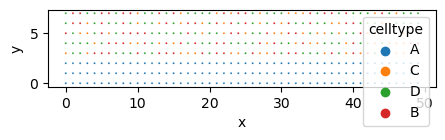

In [7]:
fig, ax = plt.subplots(figsize=(5, 1))
sns.scatterplot(df, x='x', y='y', hue='celltype', s=2., ax=ax)

(175.0, 225.0)

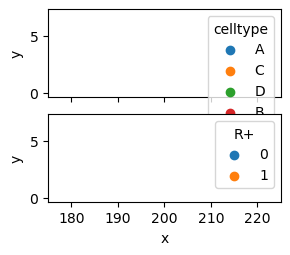

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(3, 2.5), sharex=True, sharey=False)
sns.scatterplot(df, x='x', y='y', hue='celltype', s=5., ax=axes[0])
sns.scatterplot(df, x='x', y='y', hue='R+', s=5., ax=axes[1])
plt.xlim((175, 225))

In [9]:
# Housekeeping genes that are uniform over all cell types
df['H1'] = 50
df['H2'] = 50
df['H3'] = 50
df['H4'] = 50
# df['H5'] = 10
# df['H6'] = 10
# df['H7'] = 10
# df['H8'] = 10

# Cell identity genes that are over expressed in the corresponding cell type
df['A1'] = 1
df['A2'] = 1
df['B1'] = 1
df['B2'] = 1
df['C1'] = 1
df['C2'] = 1
df['D1'] = 1
df['D2'] = 1

df.loc[df['celltype'] == 'A', 'A1'] = 50 
df.loc[df['celltype'] == 'A', 'A2'] = 50
df.loc[df['celltype'] == 'B', 'B1'] = 50
df.loc[df['celltype'] == 'B', 'B2'] = 50
df.loc[df['celltype'] == 'C', 'C1'] = 50
df.loc[df['celltype'] == 'C', 'C2'] = 50
df.loc[df['celltype'] == 'D', 'D1'] = 50
df.loc[df['celltype'] == 'D', 'D2'] = 50

# LR
# df['L1'] = 0
# df.loc[:, 'L1'] = 30 * df['LA+']
# df['L2'] = 0
# df.loc[:, 'L2'] = 30 * df['LA+']
df['R'] = 1
df.loc[:, 'R'] = 50 * df['R+']
# df['R2'] = 0
# df.loc[:, 'R2'] = 30 * df['RB+']

In [10]:
df

,x,y,celltype,R+,H1,H2,H3,H4,A1,A2,B1,B2,C1,C2,D1,D2,R
cell_0_0,0,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
cell_1_0,1,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
cell_2_0,2,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
cell_3_0,3,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
cell_4_0,4,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_45_7,45,7,D,0,50,50,50,50,1,1,1,1,1,1,50,50,0
cell_46_7,46,7,C,0,50,50,50,50,1,1,1,1,50,50,1,1,0
cell_47_7,47,7,D,0,50,50,50,50,1,1,1,1,1,1,50,50,0
cell_48_7,48,7,D,0,50,50,50,50,1,1,1,1,1,1,50,50,0


In [11]:
features = df.columns[meta_expr_split:].tolist()
print(*features)

H1 H2 H3 H4 A1 A2 B1 B2 C1 C2 D1 D2 R


In [12]:
df

,x,y,celltype,R+,H1,H2,H3,H4,A1,A2,B1,B2,C1,C2,D1,D2,R
cell_0_0,0,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
cell_1_0,1,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
cell_2_0,2,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
cell_3_0,3,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
cell_4_0,4,0,A,0,50,50,50,50,50,50,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_45_7,45,7,D,0,50,50,50,50,1,1,1,1,1,1,50,50,0
cell_46_7,46,7,C,0,50,50,50,50,1,1,1,1,50,50,1,1,0
cell_47_7,47,7,D,0,50,50,50,50,1,1,1,1,1,1,50,50,0
cell_48_7,48,7,D,0,50,50,50,50,1,1,1,1,1,1,50,50,0


In [13]:
expr = np.random.poisson(df[features])

In [14]:
expr_df = pd.DataFrame(expr, index=df.index, columns=[features])

In [15]:
expr_df[['H1', 'H2', 'H3', 'H4']] = 50

In [16]:
# expr_df['R'] = df['R+'] * expr_df[['B1', 'C1', 'B2', 'C2']].sum(axis=1) // 2
# expr_df['R2'] = df['R+'] * expr_df[['B2', 'C2', 'D2']].sum(axis=1) // 1

In [17]:
expr_df

,H1,H2,H3,H4,A1,A2,B1,B2,C1,C2,D1,D2,R
cell_0_0,50,50,50,50,48,49,1,2,0,0,0,0,0
cell_1_0,50,50,50,50,60,57,0,3,1,0,2,2,0
cell_2_0,50,50,50,50,51,49,0,3,0,1,1,1,0
cell_3_0,50,50,50,50,57,38,2,4,0,2,1,1,0
cell_4_0,50,50,50,50,59,69,1,3,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_45_7,50,50,50,50,1,0,0,0,0,2,68,62,0
cell_46_7,50,50,50,50,1,0,0,1,56,47,0,2,0
cell_47_7,50,50,50,50,2,1,1,0,1,1,58,44,0
cell_48_7,50,50,50,50,1,0,4,1,2,2,57,66,0


In [18]:
df.iloc[:, :meta_expr_split].to_csv("sim_meta_rectangle2.csv")
expr_df.to_csv("sim_expr_rectangle2.csv")